In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [94]:
#importation data 
df = pd.read_csv("data/users.csv")

In [100]:
df.isnull().sum().sum()


1211192

NaN values in the dataset. 2 options : delete row with NaN values or remplace NaN value by mean. 

In [103]:
#Delete NaN values 
#df_clean = df.dropna()
df_filled = df.fillna(df.mean(numeric_only=True))


In [105]:
#Center Reduce the data 
sc = StandardScaler()
users_cr = sc.fit_transform(df_clean.values)

In [107]:
#Implementation of the CPA
pca = PCA()
principal_components = pca.fit_transform(users_cr)
n = (pca.n_components_)
print(n)

13


    Val.Propre    Seuils
0     4.573619  3.180134
1     1.261429  2.180134
2     1.058684  1.680134
3     1.000524  1.346800
4     1.000274  1.096800
5     0.986458  0.896800
6     0.936788  0.730134
7     0.901129  0.587277
8     0.673317  0.462277
9     0.428617  0.351166
10    0.089746  0.251166
11    0.059483  0.160256
12    0.029953  0.076923


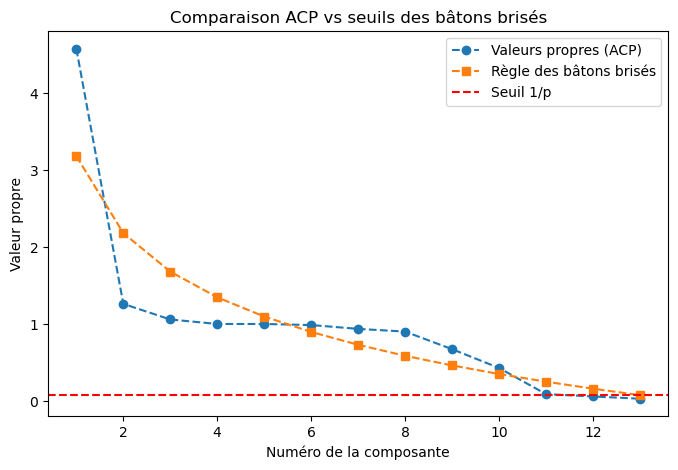

In [109]:
#Eigvalues
valeurs_propres = pca.explained_variance_
n = len(eig)  

# Calculation of the broken stick rule thresholds
bk = 1 / np.arange(n, 0, -1)  
bk = np.cumsum(bk) 
bk = bk[::-1]  # Inversion to match the descending order of the eigenvalues

# Comparison of eigenvalues and thresholds
print(pd.DataFrame({'Val.Propre': valeurs_propres, 'Seuils': bk}))

# Display of eigenvalues and broken stick rule values
plt.figure(figsize=(8,5))
plt.plot(range(1, n+1), valeurs_propres, marker='o', linestyle='--', label="Valeurs propres (ACP)")
plt.plot(range(1, n+1), bk, marker='s', linestyle='--', label="Règle des bâtons brisés")
plt.axhline(y=1/n, color='r', linestyle='dashed', label="Seuil 1/p")  # Seuil d'égalité
plt.xlabel("Numéro de la composante")
plt.ylabel("Valeur propre")
plt.title("Comparaison ACP vs seuils des bâtons brisés")
plt.legend()
plt.show()

Use 3 eigvalues for the ACP. 

In [112]:
# Retrieve eigenvalues / variance / inertia
# Own values (variance of main components)

eig = pca.explained_variance_
print("Valeurs propres:", eig)
eig
#eigenvalues = Estimated variance with n-1 degrees of freedom
# Variance is estimated with n-1 degrees of freedom

# Explain variable for each componant (ratio)
var_explain = pca.explained_variance_ratio_
print("Variance expliquée (ratio) :", var_explain)

Valeurs propres: [4.57361882 1.26142889 1.05868369 1.00052441 1.00027388 0.98645802
 0.93678793 0.90112886 0.67331702 0.42861749 0.08974589 0.05948276
 0.02995288]
Variance expliquée (ratio) : [0.35181628 0.09703284 0.08143708 0.07696329 0.07694402 0.07588127
 0.0720605  0.06931749 0.05179354 0.03297052 0.00690352 0.00457559
 0.00230406]


In [114]:
# An adjustment is necessary to have the variance with n degrees of freedom
eigval=eig*(len(users_cr)-1)/len(users_cr)
print(eigval)

[4.57361159 1.2614269  1.05868202 1.00052283 1.0002723  0.98645646
 0.93678645 0.90112743 0.67331596 0.42861681 0.08974575 0.05948267
 0.02995283]


In [116]:
# Inertia of each axis 
np.set_printoptions(suppress=True)
print(pca.explained_variance_ratio_*100)

[35.18162759  9.70328383  8.14370782  7.69632945  7.69440231  7.58812664
  7.20604959  6.93174947  5.17935354  3.29705241  0.69035193  0.45755899
  0.23040642]


In [118]:
vp_mat=pca.components_.T
#We calculate the square root of the eigenvalues
sqrt_eigval = np.sqrt(eigval)

In [120]:
# Correlation of variables with axis
corvar = np.zeros((13,13))
for k in range(13):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

# Show variable correlation matrix x factors
print(corvar)

[[ 0.0136593   0.05025293  0.69066269 -0.19862364  0.00754041  0.41250956
   0.5206938  -0.18597103  0.06730562 -0.0190303   0.00059907 -0.00080588
  -0.00054771]
 [ 0.966379   -0.0778203  -0.00589274 -0.00008603  0.00289656  0.00239983
   0.0107663   0.00979187 -0.01670013  0.07579318  0.18289975 -0.12862304
  -0.06144299]
 [ 0.28048466  0.50208525 -0.10677301 -0.07543071 -0.00693051 -0.18413791
   0.45054503  0.61085929 -0.1759757  -0.09415728 -0.03251806 -0.03106953
   0.01407179]
 [ 0.72952062 -0.14255974  0.10366583  0.04965434 -0.01982724 -0.01563827
  -0.14950166  0.14765641  0.49859409 -0.36063422 -0.09634314 -0.0357751
  -0.01607571]
 [ 0.81570565 -0.48004     0.06299615  0.0069967   0.01693362  0.0684392
  -0.03589434  0.02068937 -0.27353004 -0.03706962 -0.01506678 -0.03907839
   0.12463681]
 [ 0.02911835  0.10146925 -0.33298729  0.56196976 -0.06836506  0.73618798
   0.06752135  0.10394895  0.00886199 -0.00852285 -0.00171561 -0.00043963
   0.00045029]
 [ 0.84640822 -0.3704281

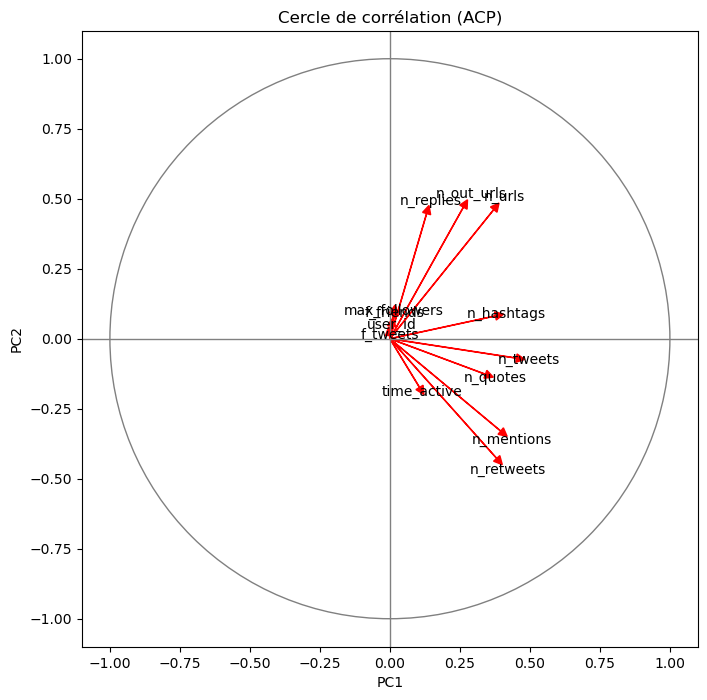

In [122]:
# The first 3 components
pcs = pca.components_[:3, :]
features = df_clean.columns

plt.figure(figsize=(8, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
plt.gca().add_patch(circle)

# arrow for each variable
for i, feature in enumerate(features):
    x = pcs[0, i]
    y = pcs[1, i]
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(x * 1.1, y * 1.1, feature, color='black', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle de corrélation (ACP)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal')
plt.show()


Good representation : n_retweets, n_mentions, n_quotes, n_tweets, n_hashtags, out_urls (near to border)
Bad representation : ser_id, max_followers, f_tweets, time_active

Correlation : n_mentions and n_retweets -> positively correlated and correlated woth axis 1
n_replies, out_urls, n_url -> positively correlated and correlated with axis 2 
n_replies and n_retweets -> decorrelated

In [133]:
# number of eig
n_comp = cos2.shape[0]
col_names = [f'cos2_PC{i+1}' for i in range(n_comp)]

# Create DataFrame
cos2_df = pd.DataFrame(cos2.T, index=features, columns=col_names)
print(cos2_df)

               cos2_PC1  cos2_PC2  cos2_PC3
user_id        0.000041  0.002002  0.450574
n_tweets       0.204191  0.004801  0.000033
n_replies      0.017201  0.199845  0.010769
n_quotes       0.116363  0.016111  0.010151
n_retweets     0.145481  0.182681  0.003749
max_followers  0.000185  0.008162  0.104735
n_mentions     0.156639  0.108779  0.001595
n_hashtags     0.141980  0.006631  0.000492
n_urls         0.137544  0.212662  0.000219
n_out_urls     0.068928  0.220835  0.001715
f_tweets       0.000002  0.000150  0.020999
f_friends      0.000252  0.007116  0.127695
time_active    0.011193  0.030224  0.267276


If a var is near to 1, they have a good representation. 

In [136]:
# Contribution (%) of variables to each axis
contrib = pcs**2
contrib = contrib / contrib.sum(axis=1)[:, np.newaxis]  # Normalisation
contrib = contrib * 100

# Générer columns name 
n_comp = contrib.shape[0]
col_names = [f'contrib_PC{i+1}' for i in range(n_comp)]

# Create dataframe
contrib_df = pd.DataFrame(contrib.T, index=features, columns=col_names)
print(contrib_df)

               contrib_PC1  contrib_PC2  contrib_PC3
user_id           0.004079     0.200198    45.057434
n_tweets         20.419058     0.480091     0.003280
n_replies         1.720121    19.984479     1.076855
n_quotes         11.636326     1.611134     1.015093
n_retweets       14.548146    18.268074     0.374854
max_followers     0.018538     0.816219    10.473450
n_mentions       15.663920    10.877921     0.159460
n_hashtags       14.198023     0.663147     0.049164
n_urls           13.754369    21.266236     0.021881
n_out_urls        6.892826    22.083492     0.171472
f_tweets          0.000154     0.015046     2.099902
f_friends         0.025170     0.711606    12.769538
time_active       1.119269     3.022354    26.727616


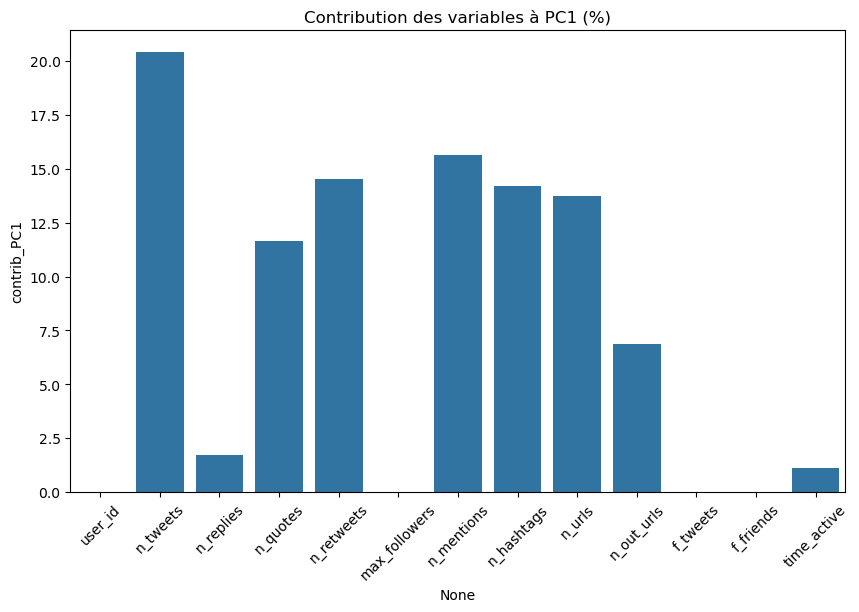

In [138]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=contrib_df.index, y=contrib_df['contrib_PC1'])
plt.xticks(rotation=45)
plt.title("Contribution des variables à PC1 (%)")
plt.show()